In [1]:
import pandas as pd

# Load FAOSTAT dataset
faostat_file = 'FAOSTAT_data_en_11-19-2025.csv'
df_faostat = pd.read_csv(faostat_file)

# Load Crop Recommendation dataset
crop_rec_file = 'Crop_recommendation.csv'
df_crop_rec = pd.read_csv(crop_rec_file)


In [2]:
# Optional: display settings
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 20)

In [3]:
# 1) Title and FAOSTAT preview (boxed)
from IPython.display import display  # Jupyter’s rich display [web:27][web:31]

print("FAOSTAT clean preview:\n")
display(df_faostat.head(10))   # boxed table


FAOSTAT clean preview:



,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livest...,356,India,5312,Area harvested,1654.0,"Anise, badian, c...",2000,2000,ha,344434.0,A,Official figure,NaN
1,QCL,Crops and livest...,356,India,5412,Yield,1654.0,"Anise, badian, c...",2000,2000,kg/ha,484.0,A,Official figure,NaN
2,QCL,Crops and livest...,356,India,5510,Production,1654.0,"Anise, badian, c...",2000,2000,t,166692.0,A,Official figure,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,QCL,Crops and livest...,356,India,5412,Yield,1654.0,"Anise, badian, c...",2002,2002,kg/ha,296.8,A,Official figure,NaN
8,QCL,Crops and livest...,356,India,5510,Production,1654.0,"Anise, badian, c...",2002,2002,t,162362.0,A,Official figure,NaN
9,QCL,Crops and livest...,356,India,5312,Area harvested,1654.0,"Anise, badian, c...",2003,2003,ha,476618.0,A,Official figure,NaN


In [4]:
import pandas as pd

pd.set_option('display.max_rows', None)   # show all rows, no "..."
# or set a large number, e.g.
# pd.set_option('display.max_rows', 1000)

Crop_Recommendation_clean_preview = df_crop_rec.head(10)  # if you made a subset
Crop_Recommendation_clean_preview


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [5]:
# Rename 'Item' column in FAOSTAT dataset to 'Crop'
df_faostat.rename(columns={'Item': 'Crop'}, inplace=True)

# Rename 'label' column in Crop Recommendation dataset to 'Crop'
df_crop_rec.rename(columns={'label': 'Crop'}, inplace=True)

# Check the renamed columns
print(df_faostat.columns)
print(df_crop_rec.columns)

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Crop', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description', 'Note'],
      dtype='object')
Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'Crop'], dtype='object')


In [6]:
# Split the 'Crop' column by commas into lists
df_faostat['Crop'] = df_faostat['Crop'].str.split(',')

# Explode the lists so each crop gets its own row
df_faostat = df_faostat.explode('Crop')

# Remove leading and trailing whitespace from each crop name
df_faostat['Crop'] = df_faostat['Crop'].str.strip()

# Check the result
print(df_faostat[['Crop']].head(10))

                  Crop
0                Anise
0               badian
0            coriander
0                cumin
0              caraway
0  fennel and junip...
0                  raw
1                Anise
1               badian
1            coriander


In [7]:
# After explode
df_exploded = df_faostat.explode('Crop')

# Display the first 10 rows
from IPython.display import display
display(df_exploded.head(10))


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Crop,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livest...,356,India,5312,Area harvested,1654.0,Anise,2000,2000,ha,344434.0,A,Official figure,NaN
0,QCL,Crops and livest...,356,India,5312,Area harvested,1654.0,badian,2000,2000,ha,344434.0,A,Official figure,NaN
0,QCL,Crops and livest...,356,India,5312,Area harvested,1654.0,coriander,2000,2000,ha,344434.0,A,Official figure,NaN
0,QCL,Crops and livest...,356,India,5312,Area harvested,1654.0,cumin,2000,2000,ha,344434.0,A,Official figure,NaN
0,QCL,Crops and livest...,356,India,5312,Area harvested,1654.0,caraway,2000,2000,ha,344434.0,A,Official figure,NaN
0,QCL,Crops and livest...,356,India,5312,Area harvested,1654.0,fennel and junip...,2000,2000,ha,344434.0,A,Official figure,NaN
0,QCL,Crops and livest...,356,India,5312,Area harvested,1654.0,raw,2000,2000,ha,344434.0,A,Official figure,NaN
1,QCL,Crops and livest...,356,India,5412,Yield,1654.0,Anise,2000,2000,kg/ha,484.0,A,Official figure,NaN
1,QCL,Crops and livest...,356,India,5412,Yield,1654.0,badian,2000,2000,kg/ha,484.0,A,Official figure,NaN
1,QCL,Crops and livest...,356,India,5412,Yield,1654.0,coriander,2000,2000,kg/ha,484.0,A,Official figure,NaN


In [8]:
# View the first 10 rows of the Crop column
print(df_faostat['Crop'].head(10))

# Check number of unique crops
print(f'Number of unique crops: {df_faostat["Crop"].nunique()}')

# Check if any rows still contain commas (should be zero)
print(f'Rows with commas: {(df_faostat["Crop"].str.contains(",")).sum()}')

0                  Anise
0                 badian
0              coriander
0                  cumin
0                caraway
0    fennel and junip...
0                    raw
1                  Anise
1                 badian
1              coriander
Name: Crop, dtype: object
Number of unique crops: 110
Rows with commas: 0


In [9]:
# Normalize crop names by converting to lowercase and stripping whitespace
df_faostat['Crop_norm'] = df_faostat['Crop'].str.lower().str.strip()
df_crop_rec['Crop_norm'] = df_crop_rec['Crop'].str.lower().str.strip()

# Merge datasets on the normalized crop names
df_merged = pd.merge(
    df_faostat,
    df_crop_rec,
    left_on='Crop_norm',
    right_on='Crop_norm',
    how='inner'
)

# Check merged dataset shape and preview
print(f'Merged dataset shape: {df_merged.shape}')
print(df_merged.head())

Merged dataset shape: (28800, 24)
  Domain Code               Domain  Area Code (M49)   Area  Element Code  \
0         QCL  Crops and livest...              356  India          5312   
1         QCL  Crops and livest...              356  India          5312   
2         QCL  Crops and livest...              356  India          5312   
3         QCL  Crops and livest...              356  India          5312   
4         QCL  Crops and livest...              356  India          5312   

          Element  Item Code (CPC)  Crop_x  Year Code  Year Unit     Value  \
0  Area harvested           1610.0  Coffee       2000  2000   ha  308433.0   
1  Area harvested           1610.0  Coffee       2000  2000   ha  308433.0   
2  Area harvested           1610.0  Coffee       2000  2000   ha  308433.0   
3  Area harvested           1610.0  Coffee       2000  2000   ha  308433.0   
4  Area harvested           1610.0  Coffee       2000  2000   ha  308433.0   

  Flag Flag Description Note Crop_norm  

In [10]:
from IPython.display import display  # only once at top of notebook

# Show shape in text
print(f'Merged dataset shape: {df_merged.shape}')

# Show nice boxed table for the first rows
display(df_merged.head(10))   # no print(), this gives the HTML box


Merged dataset shape: (28800, 24)


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Crop_x,Year Code,Year,Unit,Value,Flag,Flag Description,Note,Crop_norm,N,P,K,temperature,humidity,ph,rainfall,Crop_y
0,QCL,Crops and livest...,356,India,5312,Area harvested,1610.0,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,91,21,26,26.333780,57.364700,7.261314,191.654941,coffee
1,QCL,Crops and livest...,356,India,5312,Area harvested,1610.0,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,107,21,26,26.452885,55.322227,7.235070,144.686134,coffee
2,QCL,Crops and livest...,356,India,5312,Area harvested,1610.0,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,83,38,35,25.708227,52.886671,7.189156,136.732509,coffee
3,QCL,Crops and livest...,356,India,5312,Area harvested,1610.0,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,108,24,31,24.128325,56.181077,6.431900,147.275782,coffee
4,QCL,Crops and livest...,356,India,5312,Area harvested,1610.0,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,116,28,34,23.443723,60.395233,6.423211,122.210325,coffee
5,QCL,Crops and livest...,356,India,5312,Area harvested,1610.0,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,116,23,25,23.412371,52.269947,6.869720,139.367075,coffee
6,QCL,Crops and livest...,356,India,5312,Area harvested,1610.0,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,109,31,27,23.059519,50.406094,6.973840,164.497187,coffee
7,QCL,Crops and livest...,356,India,5312,Area harvested,1610.0,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,89,25,34,23.078954,63.658615,7.184802,129.876544,coffee
8,QCL,Crops and livest...,356,India,5312,Area harvested,1610.0,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,118,18,32,27.649611,51.110440,6.351824,122.839282,coffee
9,QCL,Crops and livest...,356,India,5312,Area harvested,1610.0,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,111,32,34,25.467437,69.351612,6.392048,171.376446,coffee


In [14]:
# Save the merged dataset - CORRECT variable name
df_merged.to_csv('mergedoutput.csv', index=False)
print("Merged dataset saved as 'mergedoutput.csv'")
print(f"Shape: {df_merged.shape}")


Merged dataset saved as 'mergedoutput.csv'
Shape: (28800, 24)


In [16]:
# Load the saved merged data anytime
df_merged = pd.read_csv('mergedoutput.csv')
print("Loaded merged dataset:")
display(df_merged.head())


Loaded merged dataset:


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Crop_x,Year Code,Year,Unit,Value,Flag,Flag Description,Note,Crop_norm,N,P,K,temperature,humidity,ph,rainfall,Crop_y
0,QCL,Crops and livest...,356,India,5312,Area harvested,1610.0,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,91,21,26,26.333780,57.364700,7.261314,191.654941,coffee
1,QCL,Crops and livest...,356,India,5312,Area harvested,1610.0,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,107,21,26,26.452885,55.322227,7.235070,144.686134,coffee
2,QCL,Crops and livest...,356,India,5312,Area harvested,1610.0,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,83,38,35,25.708227,52.886671,7.189156,136.732509,coffee
3,QCL,Crops and livest...,356,India,5312,Area harvested,1610.0,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,108,24,31,24.128325,56.181077,6.431900,147.275782,coffee
4,QCL,Crops and livest...,356,India,5312,Area harvested,1610.0,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,116,28,34,23.443723,60.395233,6.423211,122.210325,coffee


In [19]:
print("Actual columns:")
print(df_merged.columns.tolist())
print("\nFirst few rows:")
display(df_merged.head())


Actual columns:
['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code', 'Element', 'Item Code (CPC)', 'Crop_x', 'Year Code', 'Year', 'Unit', 'Value', 'Flag', 'Flag Description', 'Note', 'Crop_norm', 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'Crop_y']

First few rows:


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Crop_x,Year Code,Year,Unit,Value,Flag,Flag Description,Note,Crop_norm,N,P,K,temperature,humidity,ph,rainfall,Crop_y
0,QCL,Crops and livest...,356,India,5312,Area harvested,1610.0,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,91,21,26,26.333780,57.364700,7.261314,191.654941,coffee
1,QCL,Crops and livest...,356,India,5312,Area harvested,1610.0,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,107,21,26,26.452885,55.322227,7.235070,144.686134,coffee
2,QCL,Crops and livest...,356,India,5312,Area harvested,1610.0,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,83,38,35,25.708227,52.886671,7.189156,136.732509,coffee
3,QCL,Crops and livest...,356,India,5312,Area harvested,1610.0,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,108,24,31,24.128325,56.181077,6.431900,147.275782,coffee
4,QCL,Crops and livest...,356,India,5312,Area harvested,1610.0,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,116,28,34,23.443723,60.395233,6.423211,122.210325,coffee


In [20]:
keep_cols = [
     'Element', 'Crop_x',  'Value',   # production data
    'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'  # environmental parameters
]

df_clean = df_merged[keep_cols].copy()
df_clean = df_clean.rename(columns={'Crop_x': 'Crop'})  # rename for readability

print(f"Clean dataset shape: {df_clean.shape}")
display(df_clean.head())

# Save cleaned dataset
df_clean.to_csv('merged_clean.csv', index=False)
print("Clean dataset saved as 'merged_clean.csv'")


Clean dataset shape: (28800, 10)


,Element,Crop,Value,N,P,K,temperature,humidity,ph,rainfall
0,Area harvested,Coffee,308433.0,91,21,26,26.333780,57.364700,7.261314,191.654941
1,Area harvested,Coffee,308433.0,107,21,26,26.452885,55.322227,7.235070,144.686134
2,Area harvested,Coffee,308433.0,83,38,35,25.708227,52.886671,7.189156,136.732509
3,Area harvested,Coffee,308433.0,108,24,31,24.128325,56.181077,6.431900,147.275782
4,Area harvested,Coffee,308433.0,116,28,34,23.443723,60.395233,6.423211,122.210325


Clean dataset saved as 'merged_clean.csv'


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

print("=== DATASET OVERVIEW ===")
print(f"Shape: {df_clean.shape}")
print("\nData Types:")
print(df_clean.dtypes)
print("\nMissing Values:")
print(df_clean.isnull().sum())
print("\nDataset Info:")
df_clean.info()


=== DATASET OVERVIEW ===
Shape: (28800, 10)

Data Types:
Element         object
Crop            object
Value          float64
N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
dtype: object

Missing Values:
Element        0
Crop           0
Value          0
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Element      28800 non-null  object 
 1   Crop         28800 non-null  object 
 2   Value        28800 non-null  float64
 3   N            28800 non-null  int64  
 4   P            28800 non-null  int64  
 5   K            28800 non-null  int64  
 6   temperature  28800 non-null  float

In [22]:
print("=== SUMMARY STATISTICS ===")
display(df_clean.describe())
print("\nCategorical Counts:")
print(df_clean['Element'].value_counts())
print("\nTop 10 Crops:")
print(df_clean['Crop'].value_counts().head(10))


=== SUMMARY STATISTICS ===


,Value,N,P,K,temperature,humidity,ph,rainfall
count,2.880000e+04,28800.000000,28800.000000,28800.000000,28800.000000,28800.000000,28800.000000,28800.000000
mean,1.715771e+07,70.667500,63.927500,77.477500,24.509440,75.664440,6.493623,159.663009
std,4.420544e+07,31.211949,41.006836,70.991792,5.098522,10.574336,0.593967,63.733378
min,6.943000e+02,0.000000,15.000000,25.000000,8.825675,50.045570,5.005307,65.010953
25%,7.288550e+03,55.000000,37.000000,35.000000,23.176366,70.648966,6.085485,105.096066
50%,3.260620e+05,79.000000,47.000000,40.000000,24.846438,80.719235,6.428868,168.977582
75%,1.841250e+06,92.000000,75.000000,82.500000,26.392599,82.739731,6.981234,194.931719
max,2.067270e+08,120.000000,145.000000,205.000000,41.948657,89.891065,7.868475,298.560117



Categorical Counts:
Element
Area harvested    9600
Yield             9600
Production        9600
Name: count, dtype: int64

Top 10 Crops:
Crop
Coffee    7200
Grapes    7200
Jute      7200
Rice      7200
Name: count, dtype: int64


(array([0, 1, 2]),
 [Text(0, 0, 'Production'), Text(1, 0, 'Area harvested'), Text(2, 0, 'Yield')])

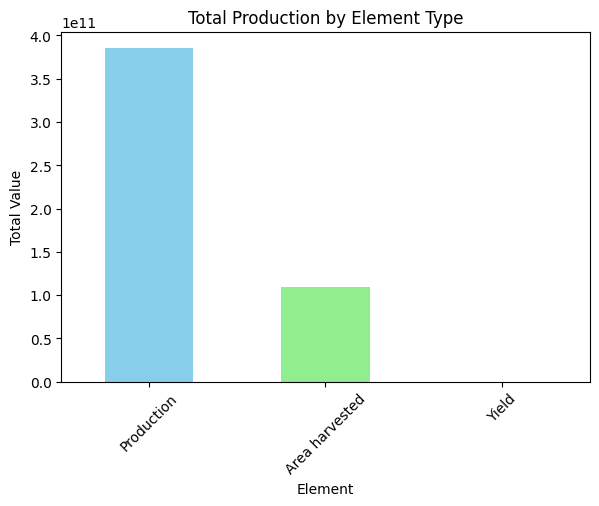

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# Plot 1: Production by Element (Total across all data)
plt.subplot(2, 2, 1)
element_totals = df_clean.groupby('Element')['Value'].sum().sort_values(ascending=False)
element_totals.plot(kind='bar', color=['skyblue', 'lightgreen', 'orange'])
plt.title('Total Production by Element Type')
plt.ylabel('Total Value')
plt.xlabel('Element')
plt.xticks(rotation=45)

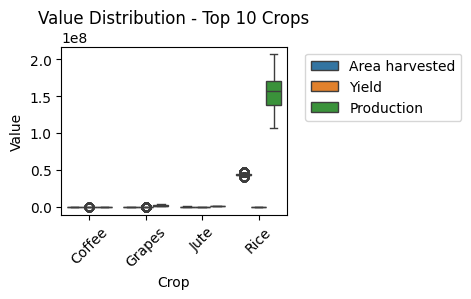

In [26]:
plt.subplot(2, 2, 2)
top_crops = df_clean['Crop'].value_counts().head(10).index
df_top = df_clean[df_clean['Crop'].isin(top_crops)]
sns.boxplot(data=df_top, x='Crop', y='Value', hue='Element')
plt.title('Value Distribution - Top 10 Crops')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Rice'),
  Text(1, 0, 'Jute'),
  Text(2, 0, 'Grapes'),
  Text(3, 0, 'Coffee')])

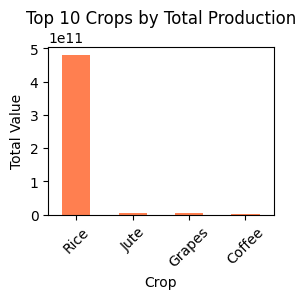

In [27]:
# Plot 3: Top Crops by Total Production
plt.subplot(2, 2, 3)
crop_totals = df_clean.groupby('Crop')['Value'].sum().sort_values(ascending=False).head(10)
crop_totals.plot(kind='bar', color='coral')
plt.title('Top 10 Crops by Total Production')
plt.ylabel('Total Value')
plt.xticks(rotation=45)

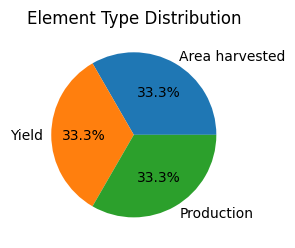

In [28]:
# Plot 4: Element Distribution
plt.subplot(2, 2, 4)
element_counts = df_clean['Element'].value_counts()
plt.pie(element_counts.values, labels=element_counts.index, autopct='%1.1f%%')
plt.title('Element Type Distribution')

plt.tight_layout()
plt.show()

=== ENVIRONMENTAL PARAMETERS BY CROP ===


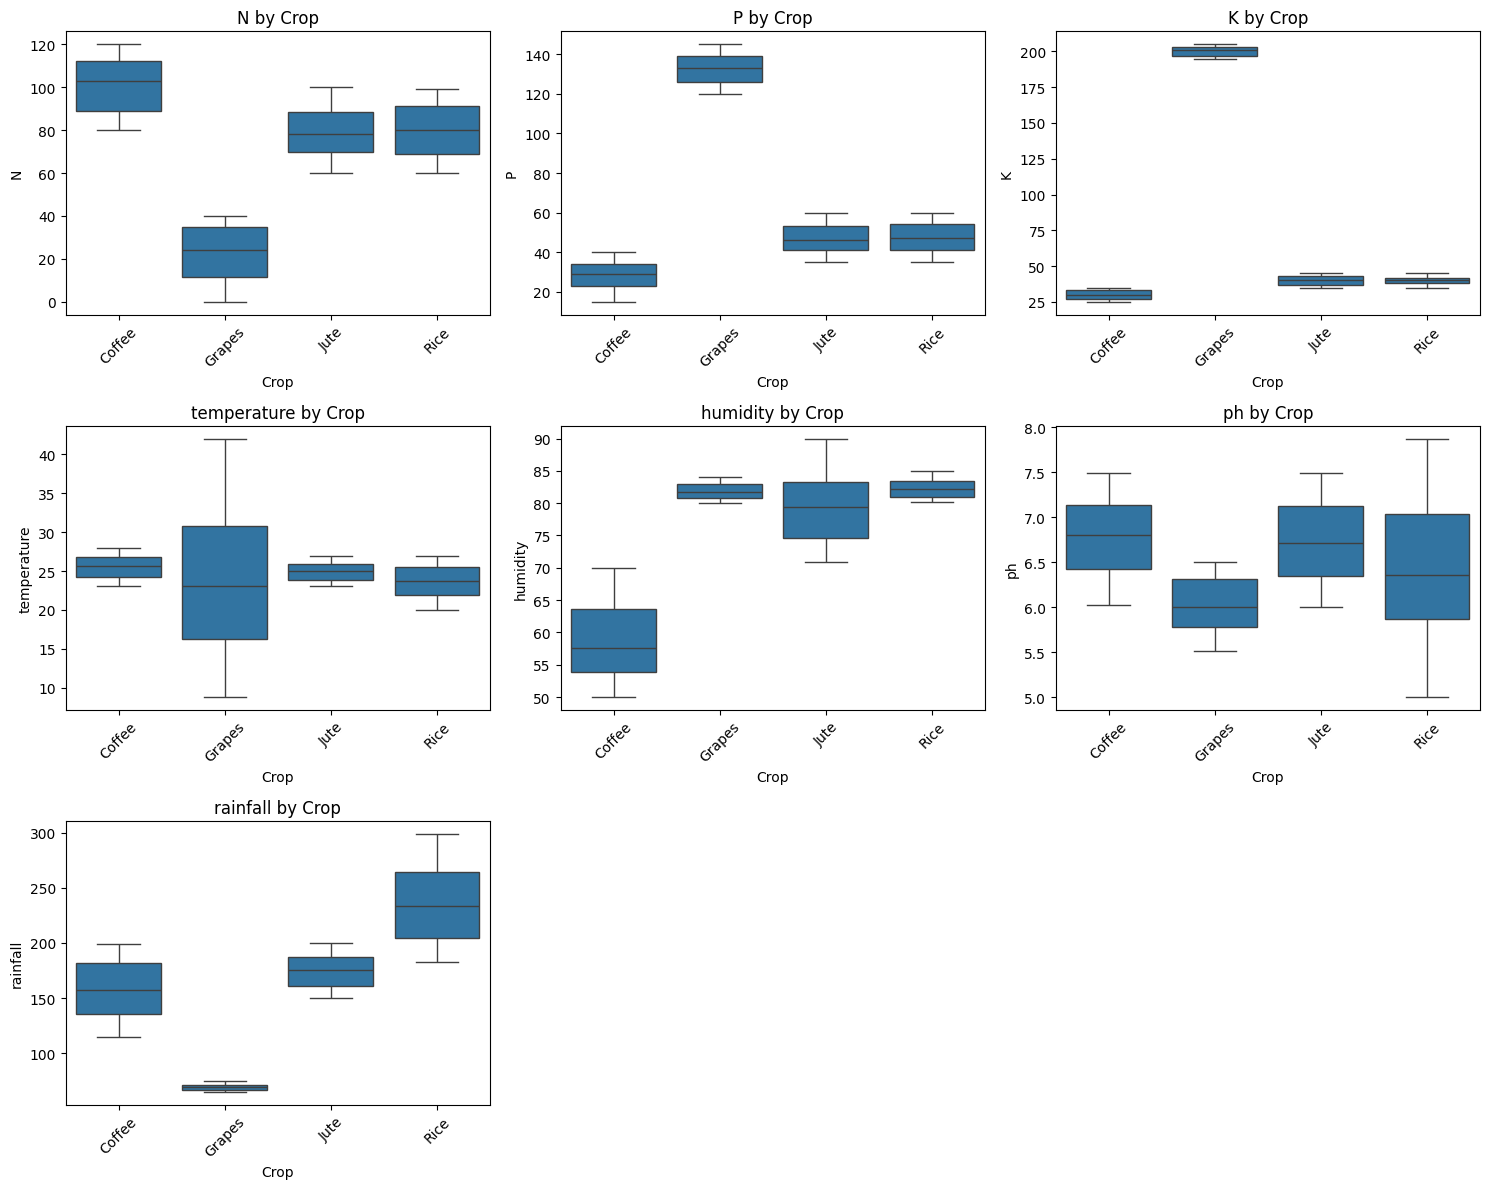

In [29]:
# Crop requirements distribution
env_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
print("=== ENVIRONMENTAL PARAMETERS BY CROP ===")

plt.figure(figsize=(15, 12))
for i, col in enumerate(env_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df_clean, x='Crop', y=col)
    plt.title(f'{col} by Crop')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


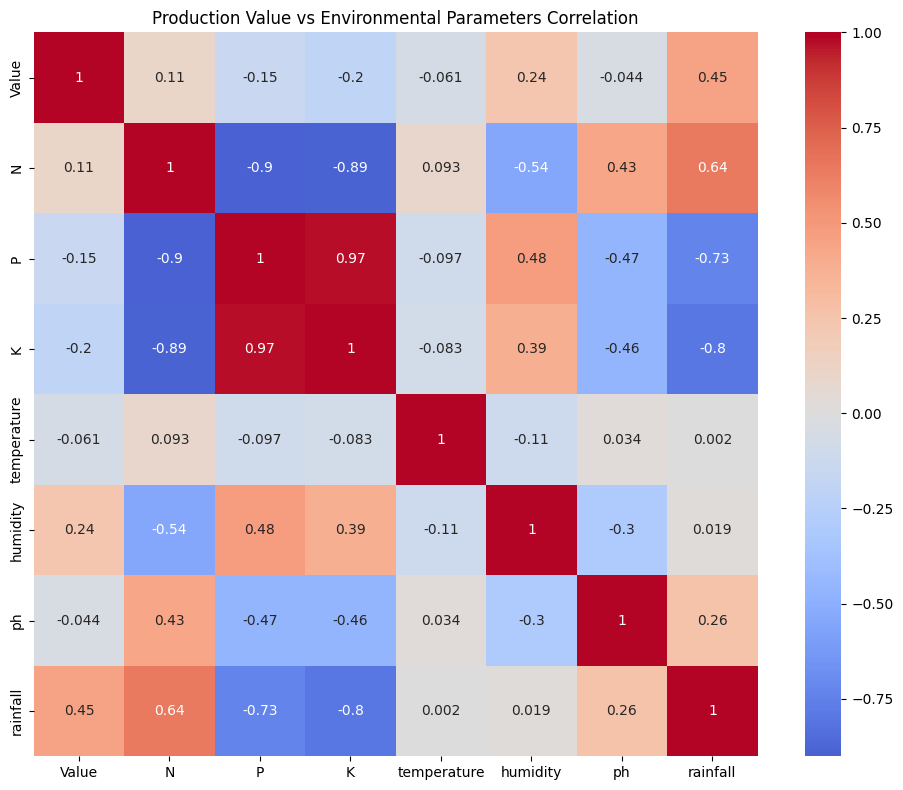

In [30]:
# Numeric correlations
numeric_cols = ['Value', 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
corr_matrix = df_clean[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Production Value vs Environmental Parameters Correlation')
plt.tight_layout()
plt.show()


In [33]:
print("=== QUICK INSIGHTS ===")
insights = pd.DataFrame({
    'Metric': [
        'Total Rows', 
        'Unique Crops', 
        'Elements', 
        'Avg Value', 
        'High N Crops (>100)', 
        'High Rainfall Crops (>200mm)'
    ],
    'Value': [
        len(df_clean),
        df_clean['Crop'].nunique(),
        df_clean['Element'].nunique(),
        round(df_clean['Value'].mean(), 1),
        len(df_clean[df_clean['N'] > 100]['Crop'].unique()),
        len(df_clean[df_clean['rainfall'] > 200]['Crop'].unique())
    ]
})
display(insights)


=== QUICK INSIGHTS ===


,Metric,Value
0,Total Rows,28800.0
1,Unique Crops,4.0
2,Elements,3.0
3,Avg Value,17157707.6
4,High N Crops (>100),1.0
5,High Rainfall Cr...,1.0


In [34]:
print("=== NULL VALUES ===")
null_counts = df_clean.isnull().sum()
print(null_counts[null_counts > 0])

# Drop rows with nulls in key columns (production data)
df_cleaned = df_clean.dropna(subset=['Value', 'N', 'P', 'K']).copy()
print(f"\nRows after null removal: {len(df_cleaned)} (dropped {len(df_clean) - len(df_cleaned)})")


=== NULL VALUES ===
Series([], dtype: int64)

Rows after null removal: 28800 (dropped 0)


In [35]:
print("=== DUPLICATES ===")
initial_rows = len(df_cleaned)
duplicates = df_cleaned.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

# Remove exact duplicates
df_cleaned = df_cleaned.drop_duplicates()
print(f"Rows after duplicate removal: {len(df_cleaned)} (dropped {initial_rows - len(df_cleaned)})")


=== DUPLICATES ===
Duplicate rows: 300
Rows after duplicate removal: 28500 (dropped 300)


In [36]:
from scipy import stats

print("=== OUTLIERS DETECTION ===")
numeric_cols = ['Value', 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

outlier_counts = {}
for col in numeric_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df_cleaned[(df_cleaned[col] < lower) | (df_cleaned[col] > upper)]
    outlier_counts[col] = len(outliers)
    print(f"{col}: {len(outliers)} outliers")

# Remove outliers from Value (production) - most critical
df_final = df_cleaned[
    (df_cleaned['Value'] >= df_cleaned['Value'].quantile(0.01)) & 
    (df_cleaned['Value'] <= df_cleaned['Value'].quantile(0.99))
].copy()

print(f"\nFinal clean dataset: {len(df_final)} rows")


=== OUTLIERS DETECTION ===
Value: 4800 outliers
N: 0 outliers
P: 0 outliers
K: 0 outliers
temperature: 4176 outliers
humidity: 1633 outliers
ph: 0 outliers
rainfall: 0 outliers

Final clean dataset: 28100 rows


In [37]:
# ONE-CELL CLEANUP SOLUTION
df_final = (df_clean
    .dropna(subset=['Value', 'N', 'P', 'K'])           # Remove nulls
    .drop_duplicates()                                 # Remove duplicates
    .query("Value >= Value.quantile(0.01) & Value <= Value.quantile(0.99)")  # Remove extreme outliers
    .reset_index(drop=True)
)

print("✅ CLEANING SUMMARY")
print(f"Original:     {len(df_clean):,} rows")
print(f"Final:        {len(df_final):,} rows")
print(f"Removed:      {len(df_clean) - len(df_final):,} rows ({100*(1-len(df_final)/len(df_clean)):.1f}%)")
print(f"Shape:        {df_final.shape}")
print("\nNo nulls left:", df_final.isnull().sum().sum() == 0)
print("No duplicates:", df_final.duplicated().sum() == 0)

# Save final clean dataset
df_final.to_csv('df_final_clean.csv', index=False)
print("💾 Saved as 'df_final_clean.csv'")


✅ CLEANING SUMMARY
Original:     28,800 rows
Final:        28,100 rows
Removed:      700 rows (2.4%)
Shape:        (28100, 10)

No nulls left: True
No duplicates: True
💾 Saved as 'df_final_clean.csv'


In [38]:
print("=== FINAL DATASET STATUS ===")
print("Nulls:", df_final.isnull().sum().sum())
print("Duplicates:", df_final.duplicated().sum())
print("\nShape:", df_final.shape)
display(df_final.describe())


=== FINAL DATASET STATUS ===
Nulls: 0
Duplicates: 0

Shape: (28100, 10)


,Value,N,P,K,temperature,humidity,ph,rainfall
count,2.810000e+04,28100.000000,28100.000000,28100.000000,28100.000000,28100.000000,28100.000000,28100.000000
mean,1.611803e+07,70.220854,64.540996,78.519502,24.501074,75.768412,6.489239,159.027757
std,4.177413e+07,31.365772,41.285780,71.553158,5.153836,10.515149,0.593953,64.051020
min,7.484000e+02,0.000000,15.000000,25.000000,8.825675,50.045570,5.005307,65.010953
25%,8.277300e+03,40.000000,37.000000,35.000000,23.173336,70.890007,6.074190,74.628349
50%,3.251240e+05,78.000000,47.000000,40.000000,24.838462,80.731127,6.425420,168.784889
75%,1.840000e+06,91.000000,120.000000,195.000000,26.403232,82.748356,6.980401,194.877348
max,1.941980e+08,120.000000,145.000000,205.000000,41.948657,89.891065,7.868475,298.560117


In [39]:
print("=== FINAL DATASET VERIFICATION ===")
print("="*50)

# 1. BASIC INFO
print("\n1. SHAPE & STRUCTURE")
print(f"Shape: {df_final.shape}")
print(f"Columns: {list(df_final.columns)}")
print("Data types:")
print(df_final.dtypes)


=== FINAL DATASET VERIFICATION ===

1. SHAPE & STRUCTURE
Shape: (28100, 10)
Columns: ['Element', 'Crop', 'Value', 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
Data types:
Element         object
Crop            object
Value          float64
N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
dtype: object


In [41]:
# Run once if tabulate not installed
!pip install tabulate



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
from tabulate import tabulate

num_cols = ['Value','N','P','K','temperature','humidity','ph','rainfall']

# One row per Element, mean of each numeric column
summary_by_element = (
    df_final
    .groupby('Element')[num_cols]
    .mean()
    .reset_index()   # makes 'Element' the first column
)

print("=== MEAN VALUES BY ELEMENT ===")
print(tabulate(summary_by_element, headers='keys', tablefmt='grid', showindex=False))


=== MEAN VALUES BY ELEMENT ===
+----------------+----------------+---------+---------+---------+---------------+------------+---------+------------+
| Element        |          Value |       N |       P |       K |   temperature |   humidity |      ph |   rainfall |
+================+================+=========+=========+=========+===============+============+=========+============+
| Area harvested |    1.15613e+07 | 70.503  | 64.2906 | 78.2751 |       24.4999 |    75.5799 | 6.48853 |    159.341 |
+----------------+----------------+---------+---------+---------+---------------+------------+---------+------------+
| Production     |    3.70077e+07 | 70.1409 | 64.6574 | 78.7974 |       24.516  |    75.7029 | 6.4919  |    158.035 |
+----------------+----------------+---------+---------+---------+---------------+------------+---------+------------+
| Yield          | 7282.69        | 70.0179 | 64.6762 | 78.4889 |       24.4875 |    76.0218 | 6.48731 |    159.697 |
+----------------+-------

In [45]:
# starting from full merged df
df_production = df_merged[df_merged['Element'] == 'Production'].copy()
print(df_production['Element'].value_counts())
print(df_production.shape)


Element
Production    9600
Name: count, dtype: int64
(9600, 24)


In [46]:
# keep only Production rows
df_final = df_final[df_final['Element'] == 'Production'].copy()

print(df_final['Element'].value_counts())
print("Shape after keeping only Production rows:", df_final.shape)


Element
Production    9300
Name: count, dtype: int64
Shape after keeping only Production rows: (9300, 10)


In [47]:
total_unique_crops = df_final['Crop'].nunique()
print("Total unique crops (Production only):", total_unique_crops)


Total unique crops (Production only): 4


In [49]:
unique_crops = df_final['Crop'].unique()
print("Number of unique crops:", len(unique_crops))
print("Unique crops:")
for c in unique_crops:
    print(c)


Number of unique crops: 4
Unique crops:
Coffee
Grapes
Jute
Rice
